# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunites.

## Final Deliverables
- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via README.md) capturing your findings
- Share this project via GitHub & LinkedIn

## Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Scientists?
3. How well do jobs and skills pay for Data Scientists?
4. What is the most optimal skills to learn for Data Scientists? (High Demand and High Paying)

# Exploratory Data Analysis
### Roles to Explore:

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Use ast.literal_eval to convert a list with a string type into a list type

## Filter for US Data Scientist roles

In [2]:
# Only get data scientist jobs
df_DS_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

## Job Location

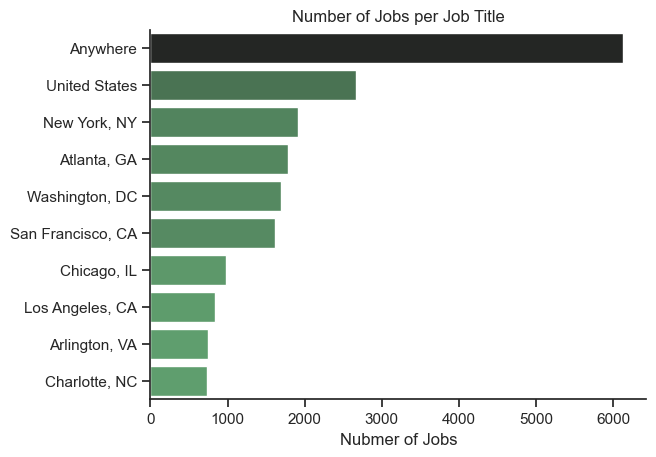

In [16]:
df_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:g_r', legend=False)
sns.despine() # Remove chart border
plt.title('Number of Jobs per Job Title')
plt.xlabel('Nubmer of Jobs')
plt.ylabel('')
plt.show()

## Work from Home Offer, Degree Requirement, and Health Insurance Offer for Data Scientist in the US

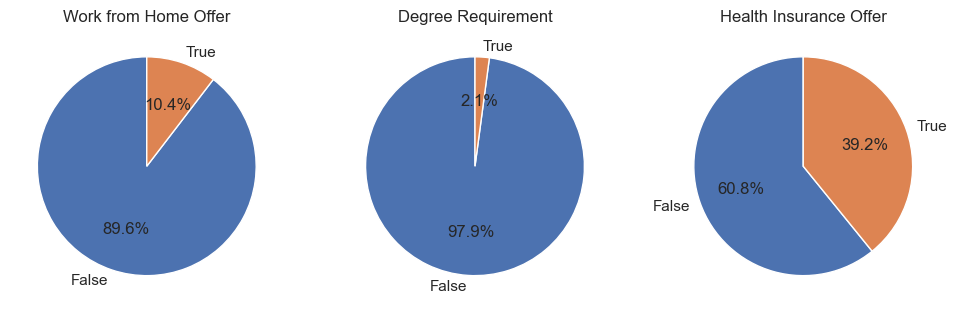

In [11]:
dict_column = {
    'job_work_from_home': 'Work from Home Offer',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offer'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[column].value_counts(),labels=[False, True], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Company Name

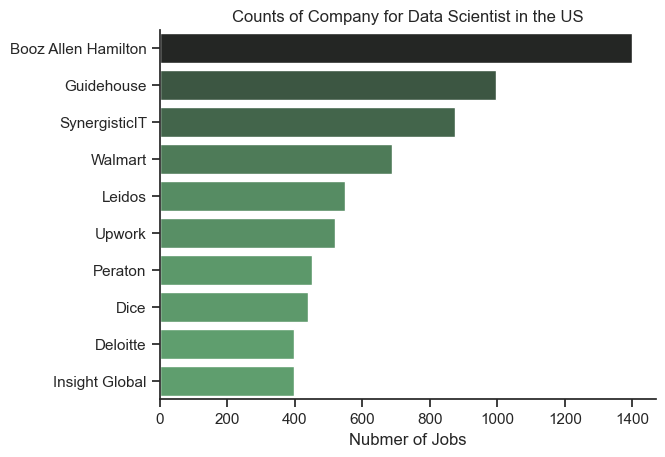

In [18]:
# command + shift + L to select multiple values
df_plot_company = df_DS_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_company, x='count', y='company_name', hue='count', palette='dark:g_r', legend=False)
sns.despine() # Remove chart border
plt.title('Counts of Company for Data Scientist in the US')
plt.xlabel('Nubmer of Jobs')
plt.ylabel('')
plt.show()